In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [162]:
#importing diabetes Dataset
diabetes_df =pd.read_csv('diabetes (1).csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
diabetes_df.shape

(768, 9)

In [164]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
diabetes_df.duplicated().sum()

0

In [166]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [167]:

# Calculate mean of each feature when outcome is 0
mean_outcome_0 = diabetes_df[diabetes_df['Outcome'] == 0].mean()

# Calculate mean of each feature when outcome is 1
mean_outcome_1 = diabetes_df[diabetes_df['Outcome'] == 1].mean()

print("Mean of each feature when outcome is 0:")
print(mean_outcome_0)

print("\nMean of each feature when outcome is 1:")
print(mean_outcome_1)

Mean of each feature when outcome is 0:
Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

Mean of each feature when outcome is 1:
Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64


In [185]:
# Fill 0's in features with mean of each feature when Outcome is 0
diabetes_df.loc[(diabetes_df['Outcome'] == 0) & (diabetes_df['Pregnancies'] == 0), 'Pregnancies'] = float(mean_outcome_0['Pregnancies'])
diabetes_df.loc[(diabetes_df['Outcome'] == 0) & (diabetes_df['Glucose'] == 0), 'Glucose'] = float(mean_outcome_0['Glucose'])
diabetes_df.loc[(diabetes_df['Outcome'] == 0) & (diabetes_df['BloodPressure'] == 0), 'BloodPressure'] = float(mean_outcome_0['BloodPressure'])
diabetes_df.loc[(diabetes_df['Outcome'] == 0) & (diabetes_df['SkinThickness'] == 0), 'SkinThickness'] = float(mean_outcome_0['SkinThickness'])
diabetes_df.loc[(diabetes_df['Outcome'] == 0) & (diabetes_df['Insulin'] == 0), 'Insulin'] = float(mean_outcome_0['Insulin'])
diabetes_df.loc[(diabetes_df['Outcome'] == 0) & (diabetes_df['BMI'] == 0), 'BMI'] = float(mean_outcome_0['BMI'])

# Fill 0's in features with mean of each feature when Outcome is 1
diabetes_df.loc[(diabetes_df['Outcome'] == 1) & (diabetes_df['Pregnancies'] == 0), 'Pregnancies'] = float(mean_outcome_1['Pregnancies'])
diabetes_df.loc[(diabetes_df['Outcome'] == 1) & (diabetes_df['Glucose'] == 0), 'Glucose'] = float(mean_outcome_1['Glucose'])
diabetes_df.loc[(diabetes_df['Outcome'] == 1) & (diabetes_df['BloodPressure'] == 0), 'BloodPressure'] = float(mean_outcome_1['BloodPressure'])
diabetes_df.loc[(diabetes_df['Outcome'] == 1) & (diabetes_df['SkinThickness'] == 0), 'SkinThickness'] = float(mean_outcome_1['SkinThickness'])
diabetes_df.loc[(diabetes_df['Outcome'] == 1) & (diabetes_df['Insulin'] == 0), 'Insulin'] = float(mean_outcome_1['Insulin'])
diabetes_df.loc[(diabetes_df['Outcome'] == 1) & (diabetes_df['BMI'] == 0), 'BMI'] = float(mean_outcome_1['BMI'])

In [169]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0
2,8.000000,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4.865672,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [170]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,68.792000,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,22.164179,100.335821,30.1,0.349,47,1
767,1.0,93.0,70.0,31.000000,68.792000,30.4,0.315,23,0


In [171]:
#statistcal analysis after replacing 0's with mean
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.399283,121.691999,72.267826,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,2.997829,30.461151,12.115948,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.298000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [172]:
#Extracting only the indipendent Variables
x = diabetes_df.iloc[:,1:8].values
#print(x[:5])

#Extracting only the dependent Values
y = diabetes_df.iloc[:, -1].values
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [173]:
x_column_names = diabetes_df.columns[1:8]
print('indipendent column names:', x_column_names)

y_column_names = diabetes_df.columns[-1:]
print('dependent column names:', y_column_names)



indipendent column names: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
dependent column names: Index(['Outcome'], dtype='object')


<Axes: >

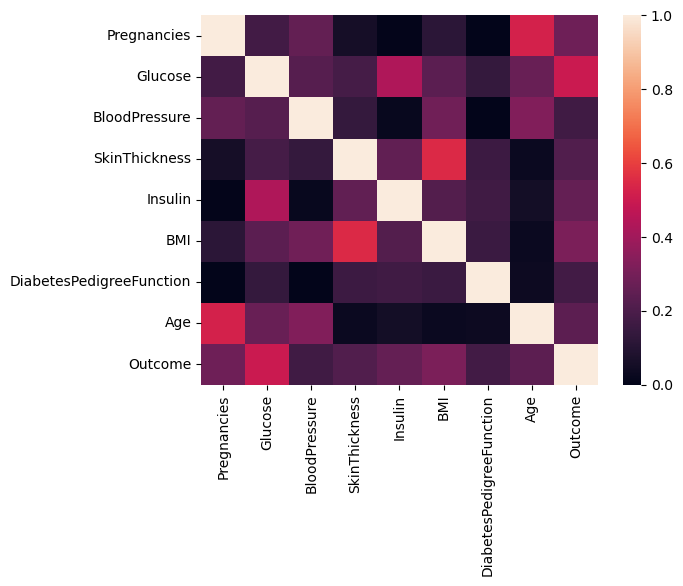

In [174]:
#visualising the dataset by drawing a correlation map
sns.heatmap(diabetes_df.corr())

In [175]:
#spliting the dataset into the training set and test set
x_train,x_test,y_train, y_test =train_test_split(x,y, test_size = 0.1, random_state=1)

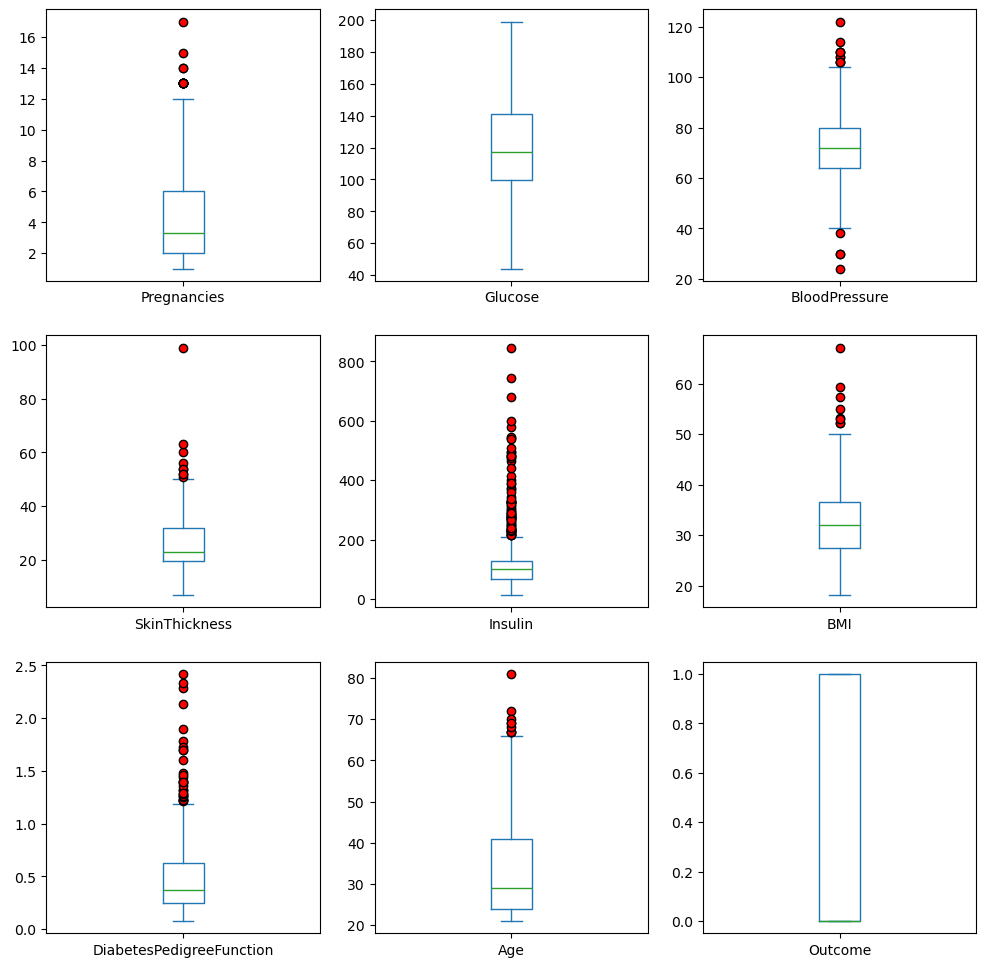

In [176]:
#shortcut method of plotting outliers
# checking for outliers and Create a boxplot for each feature
diabetes_df.plot(kind='box', subplots=True, layout=(3,3), flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'},figsize=(12,12))
plt.show()

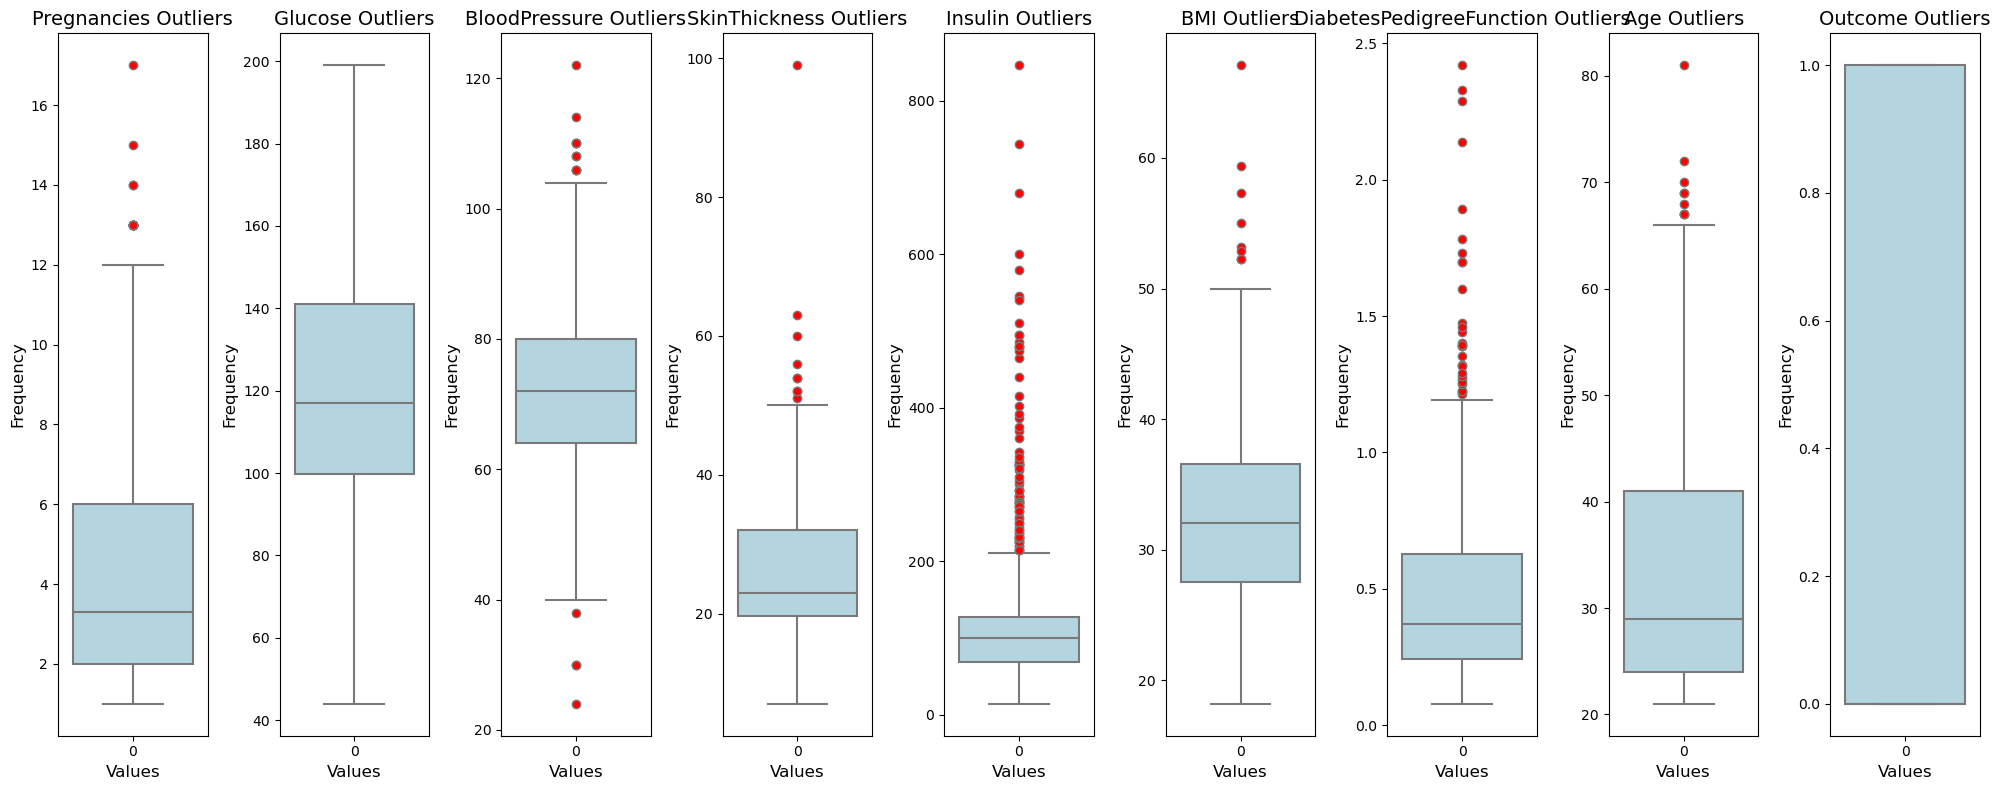

In [177]:
#Method 2 of finding outliers
# Creating a figure with multiple subplots
fig, axs = plt.subplots(nrows=1, ncols=len(diabetes_df.columns), figsize=(20, 8),)

# Iterating over each column in the DataFrame
for i, column in enumerate(diabetes_df.columns): # iterates over each column in the diabetes_df DataFrame
    # Calculate outliers using the quantile method
    q1 = diabetes_df[column].quantile(0.25)
    q3 = diabetes_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifing outliers
    outliers = diabetes_df[(diabetes_df[column] < lower_bound) | (diabetes_df[column] > upper_bound)][column]

    # Creating a boxplot with outliers marked in red
    sns.boxplot(data=diabetes_df[column], ax=axs[i], color='lightblue', flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

    # title and labels
    axs[i].set_title(f'{column} Outliers', fontsize=14)
    axs[i].set_xlabel('Values', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    
plt.tight_layout()
plt.show()

In [178]:
#feature Scalling since otliers my affect the accuracy of our model we normalise the dataset
#sc_X = StandardScaler()
#x_train = sc_X.fit_transform(x_train)
#x_test = sc_X.transform(x_test)


In [179]:
#fitting logistic regression ti training dataset
logR_model = LogisticRegression()
logR_model.fit(x_train, y_train)


LogisticRegression()

In [180]:
#predicting the test set results
y_pred = logR_model.predict(x_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [181]:
#confusion matrix evaluation
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  5],
       [11, 18]], dtype=int64)

In [182]:
#total count in my test dataset
43+5+18+11

77

In [183]:
#for correctly predicted values
(43+18)/77

0.7922077922077922

In [184]:
#for incorrectly predicted values
(+11)/77

0.14285714285714285